In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [11]:
#Loading the file
Emp_data = pd.read_csv("Downloads/Employee_Attrition.csv")
Emp_data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
Emp_data.shape

(1470, 35)

## Data Cleaning

In [5]:
Emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### There are 9 columns with data type object and out of which Attrition, Over18, Overtime and Gender has binary values which will be converted into categorical

In [10]:
Emp_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [12]:
Emp_data['Attrition'] = Emp_data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [13]:
Emp_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [14]:
Emp_data['Over18'] = Emp_data['Over18'].apply(lambda x: 1 if x == 'Y' else 0)
Emp_data['OverTime'] = Emp_data['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
Emp_data['Gender'] = Emp_data['Gender'].apply(lambda x: 1 if x == 'Female' else 0)

In [25]:
Emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   int64 
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [24]:
Emp_data.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,0.400000,65.891156,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,0.490065,20.329428,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,30.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,0.000000,48.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,0.000000,66.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,1.000000,83.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,1.000000,100.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Finding Outlayers

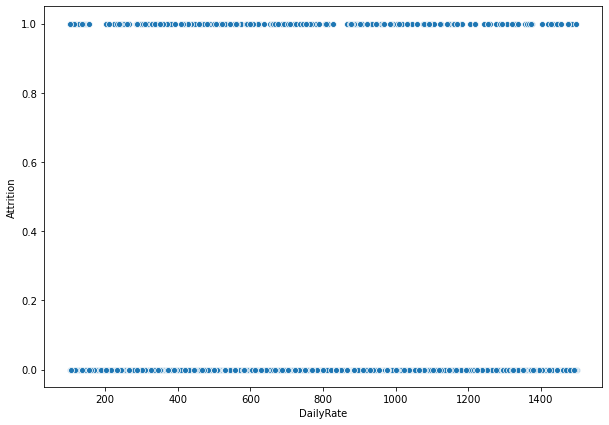

In [36]:
#plotting DailyRate(x) against Attrition(y)
plt.figure(figsize = (10,7))
sns.scatterplot(x = Emp_data["DailyRate"] , y = Emp_data["Attrition"])
plt.show()

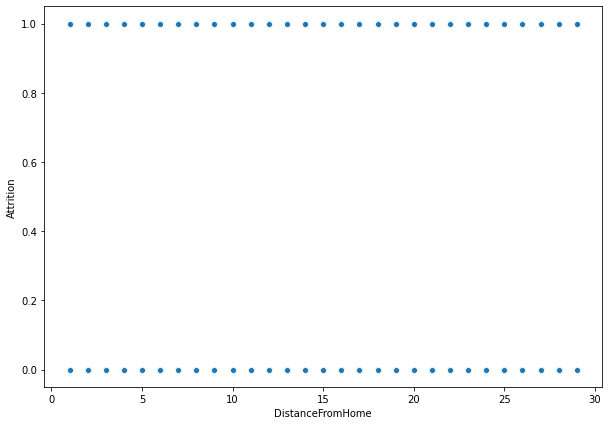

In [37]:
#plotting DistanceFromHome(x) against Attrition(y)
plt.figure(figsize = (10,7))
sns.scatterplot(x = Emp_data["DistanceFromHome"] , y = Emp_data["Attrition"])
plt.show()

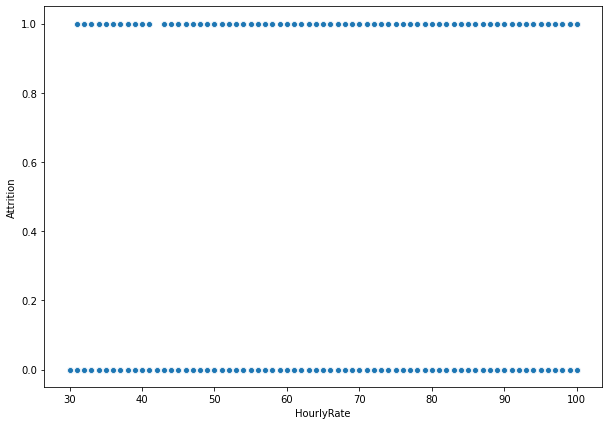

In [38]:
#plotting HourlyRate(x) against Attrition(y)
plt.figure(figsize = (10,7))
sns.scatterplot(x = Emp_data["HourlyRate"] , y = Emp_data["Attrition"])
plt.show()

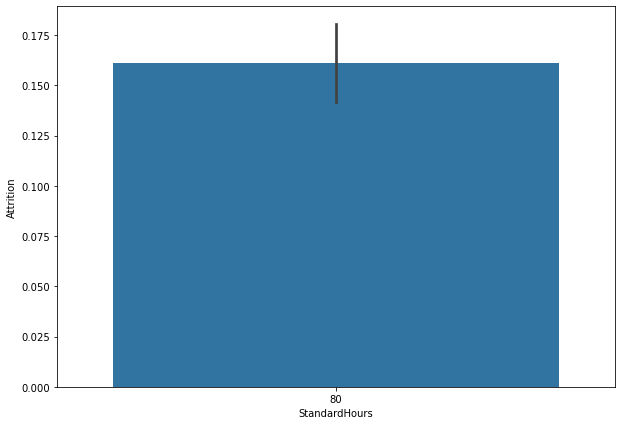

In [41]:
#plotting Standard Hours(x) against Attrition(y)
plt.figure(figsize = (10,7))
sns.barplot(x = Emp_data["StandardHours"] , y = Emp_data["Attrition"])
plt.show()

#### Value of Standard hours will reamain same for all the employees, so it will not be useful for analysis, hence will be dropped 

In [51]:
i = Emp_data.drop(["StandardHours"], axis = 1, inplace = True)

KeyError: "['StandardHours'] not found in axis"

In [53]:
Emp_data.drop(["EmployeeCount", "Over18", "EmployeeNumber"], axis = 1, inplace = True)

#### Deleted few more unwanted columns

In [54]:
Emp_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,1,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,0,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,0,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,1,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,0,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [56]:
Emp_data.shape

(1470, 31)

In [49]:
pd.set_option("display.max_columns", 0)

In [50]:
#Showing only Attrition Emp details
Emp_data[Emp_data["Attrition"]==1].describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,0.367089,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,1.0,0.535865,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,0.0,580.750572,1.169791,0.483031,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,0.0,0.499768,3.770294,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,1.0,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.0,514.000000,1.000000,0.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,1.0,0.000000,12.000000,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,1.0,1017.000000,3.000000,0.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,1.0,1.000000,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,1.0,1486.000000,4.000000,1.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,1.0,1.000000,17.000000,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,1.0,2055.000000,4.000000,1.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,1.0,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


#### Some notable points/analysis from above data, we can say that people who leave company (on average)
    1.Age is younger:33
    2.They live further from work place : 11 km
    3. Less Satisfied with Environment : 2
    4. Lower level employess : 1
    5. Not much satisfied with Job : 2
    6. Years at company : 5
    7. In the cuureny role and in in same position from 2 years
    8. Been with same manager from 3 years

### Relationship between Data points

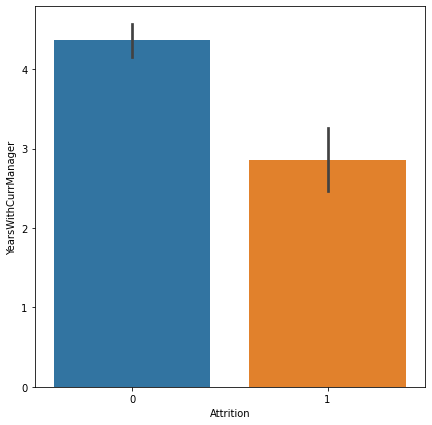

In [77]:
plt.figure(figsize = (7,7))
sns.barplot(x = "Attrition", y = "YearsWithCurrManager", data = Emp_data)
plt.show()

### From above Graph we can see employees who have spent less time with manager are more likely to leave

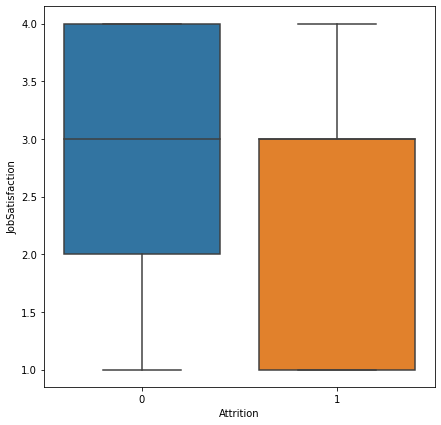

In [74]:
plt.figure(figsize = (7,7))
sns.boxplot(x = "Attrition", y = "JobSatisfaction", data = Emp_data)
plt.show()

### Employees leave if they are not satisfied with the job

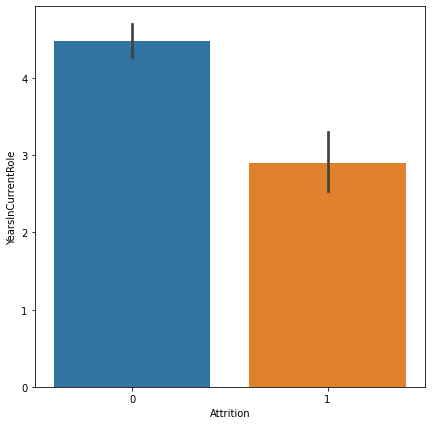

In [72]:
plt.figure(figsize = (7,7))
sns.barplot(x = "Attrition", y = "YearsInCurrentRole", data = Emp_data)
plt.show()

### People managing a particaular role from long time are less likely to leave

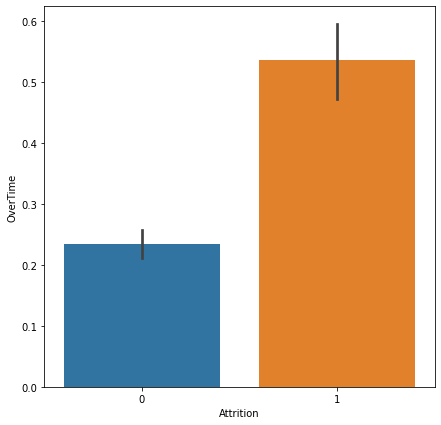

In [81]:
plt.figure(figsize = (7,7))
sns.barplot(x = "Attrition", y = "OverTime", data = Emp_data)
plt.show()

### Employees who made to work Over time can leave early due to lack of time for personal life

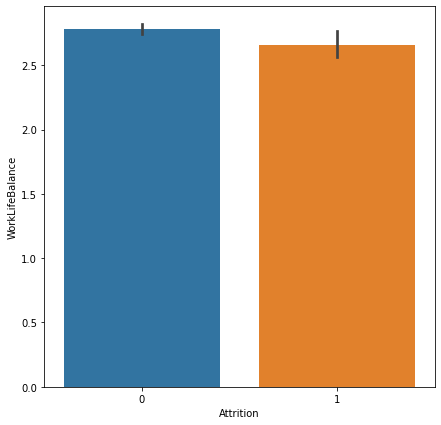

In [84]:
plt.figure(figsize = (7,7))
sns.barplot(x = "Attrition", y = "WorkLifeBalance", data = Emp_data)
plt.show()

### Cannot make notable conclusion from above graph

## Splitting the data in to Train and Test

In [109]:
MMS = MinMaxScaler()
dummies = pd.get_dummies(Emp_data[Emp_data.columns.difference(["Attrition"])])
x = MMS.fit_transform(dummies)
y = Emp_data["Attrition"]

print(x.shape)
print(y.shape)

(1470, 49)
(1470,)


In [110]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1102, 49) (368, 49) (1102,) (368,)


In [111]:
log_reg_model = LogisticRegression(max_iter=1000, solver = "newton-cg")
log_reg_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, solver='newton-cg')

In [116]:
y_pred = log_reg_model.predict(x_test)
df_predict = pd.DataFrame({"Actual":y_test, "Predicted":y_pred})
df_predict

,Actual,Predicted
442,0,0
1091,0,0
981,1,1
785,0,0
1332,1,1
...,...,...
557,0,0
831,1,0
686,0,0
969,0,0


In [121]:
accuracy_score(y_test, y_pred)

0.8913043478260869

In [123]:
print((classification_report(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       310
           1       0.82      0.40      0.53        58

    accuracy                           0.89       368
   macro avg       0.86      0.69      0.74       368
weighted avg       0.89      0.89      0.87       368

